In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def loadPrices(fn):
    global nt, nInst
    df = pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    (nt, nInst) = df.shape
    return (df)


pricesFile = "./prices.txt"
prcAll = loadPrices(pricesFile)

In [16]:
prcAll

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,13.46,71.65,48.46,50.52,52.10,13.00,18.98,47.71,69.49,49.96,...,32.64,55.76,14.46,58.94,36.71,52.62,49.33,36.22,49.00,56.09
1,13.48,72.10,48.52,50.50,52.06,12.95,18.95,47.84,69.73,49.93,...,32.52,55.97,14.44,59.81,36.64,52.58,49.20,36.27,48.84,56.08
2,13.47,72.35,48.48,50.62,51.80,12.79,18.98,47.98,69.60,49.33,...,32.48,56.34,14.50,59.04,36.89,52.49,49.48,36.39,48.56,55.90
3,13.53,72.51,48.42,50.75,51.66,12.66,18.96,48.74,69.54,49.67,...,32.59,56.32,14.40,58.73,36.94,52.40,49.42,36.41,49.00,56.14
4,13.64,71.99,48.40,50.65,51.97,12.62,18.89,48.88,69.68,49.46,...,32.64,56.32,14.36,59.01,37.03,52.44,49.79,36.42,48.14,55.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,13.69,67.73,46.64,45.72,52.42,10.07,18.05,48.42,69.00,56.19,...,30.73,75.82,10.63,61.35,32.85,50.57,64.36,33.74,33.83,53.47
496,13.58,67.75,46.65,45.71,52.57,10.07,17.99,47.65,69.04,56.00,...,30.70,76.46,10.65,61.20,32.60,50.54,64.65,33.78,33.42,53.91
497,13.69,67.83,46.66,45.66,52.38,10.02,18.02,46.87,68.95,56.09,...,30.70,75.16,10.75,60.82,32.79,50.42,64.28,33.60,33.75,54.22
498,13.55,67.61,46.73,45.62,52.29,10.02,18.03,46.21,69.03,56.51,...,30.69,76.09,10.68,60.73,32.45,50.31,63.60,33.79,33.53,54.50


<Axes: >

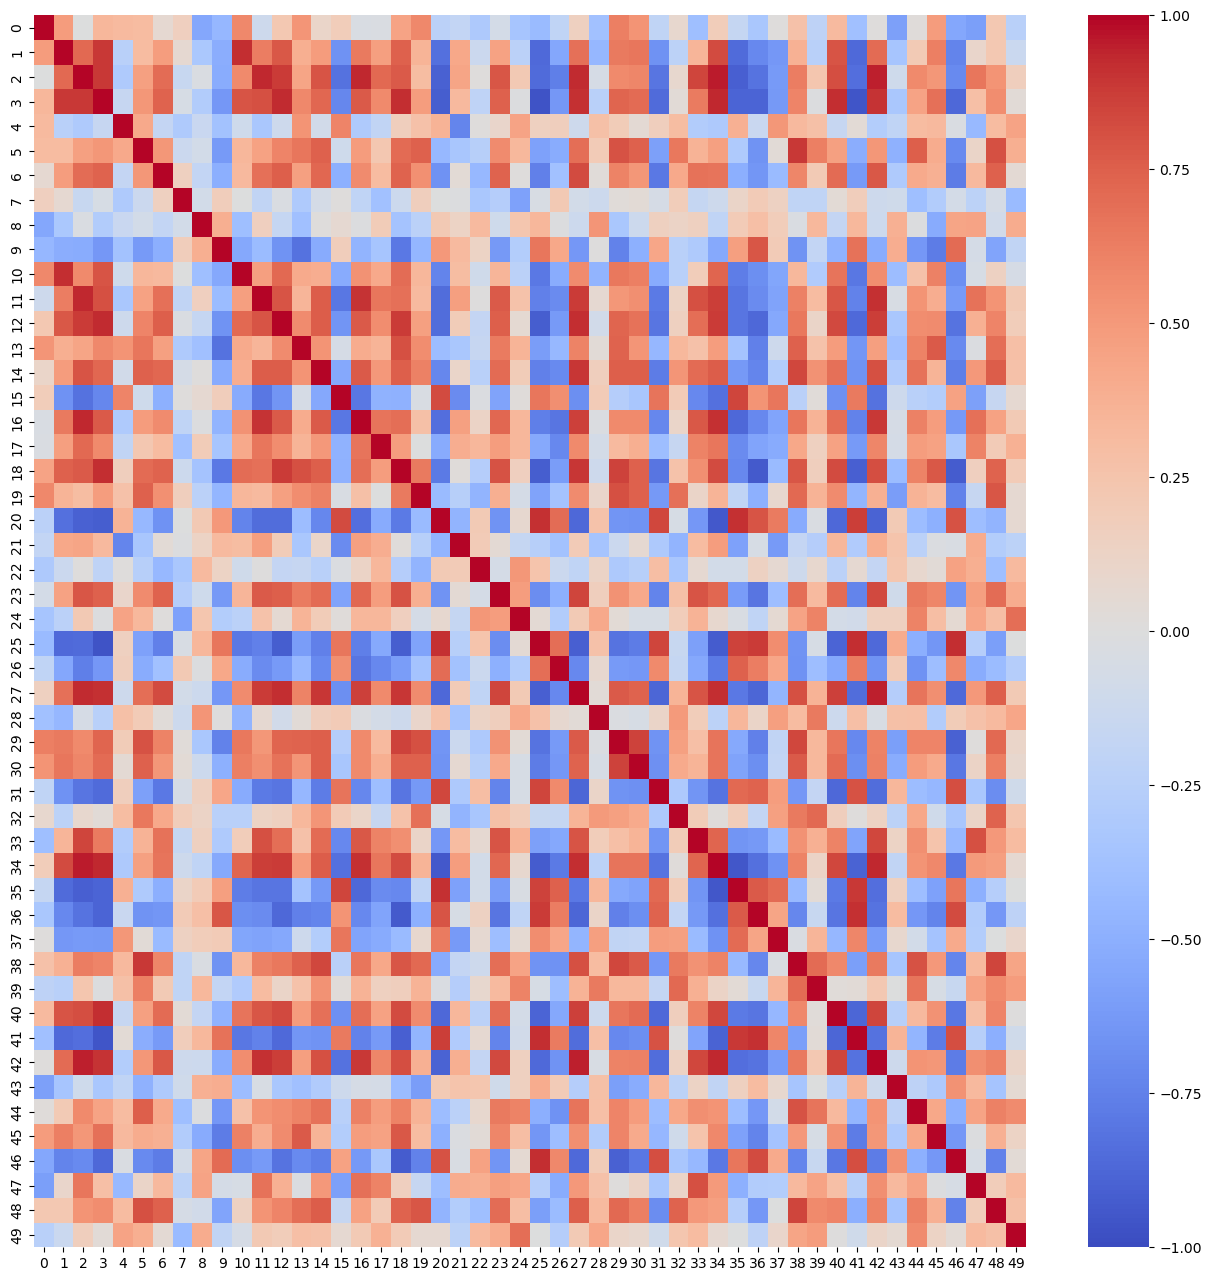

In [27]:
plt.figure(figsize=(16,16))
corr = prcAll.corr()
sns.heatmap(corr, vmin = -1, vmax = 1, cmap="coolwarm")

In [40]:
abs(corr.iloc[0,49])

0.2476996735841552

In [54]:
#find instruments with high absolute correlation with each other
corrThresh = 0.85
correlatedInsts = []

for i in corr.index:
    for j in range(i+1, 50):
        if abs(corr.iloc[i,j]) >= corrThresh:
            correlatedInsts += [(i,j, abs(corr.iloc[i,j]))]

In [58]:
correlatedInsts.sort(reverse = True, key = lambda x: x[2])

In [59]:
inst1 = correlatedInsts[0][0]
inst2 = correlatedInsts[0][1]

[(3, 25, 0.9650280360064595),
 (2, 34, 0.9545376047968843),
 (3, 41, 0.9542178191071973),
 (34, 35, 0.9486272159173792),
 (2, 42, 0.9467705974033181),
 (27, 42, 0.9467690103685851),
 (20, 34, 0.9446478255746437),
 (3, 34, 0.9363083968701297),
 (34, 42, 0.9343845824092826),
 (2, 16, 0.9317311470451733),
 (18, 36, 0.9309860198647968),
 (2, 11, 0.9302617222989346),
 (2, 27, 0.9290809736987505),
 (3, 12, 0.9277481390362928),
 (25, 34, 0.9245402647616711),
 (18, 46, 0.9244301013404015),
 (3, 40, 0.9207454013230917),
 (18, 25, 0.9200468802582196),
 (3, 20, 0.9195127818917064),
 (1, 10, 0.91932198175064),
 (12, 25, 0.9187689021666857),
 (25, 46, 0.9183733246500067),
 (12, 27, 0.9170565052444565),
 (25, 41, 0.9167475960699992),
 (3, 18, 0.9166891332053596),
 (27, 34, 0.9146437779431401),
 (20, 25, 0.9137460520012055),
 (25, 27, 0.9134400544695056),
 (36, 41, 0.9133651521192562),
 (11, 42, 0.912832897206784),
 (16, 34, 0.9097625082197329),
 (20, 35, 0.9085965658619377),
 (2, 35, 0.9080836469871